In [1]:
import os
import seaborn as sns
import copy

In [2]:
# Add current working directory to Python's sys path if not included
imp_mods = os.sys.path
my_pkg = os.getcwd()

if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print('Package imported.')

In [3]:
# import class CensusDataset from a customized module census_methods
from census_methods import CensusDataset as cd

In [4]:
# read-in data from csv file
census_df = sns.categorical.pd.read_csv("Infirmity_and_Age_cleaned.csv")

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Retired                        7581 non-null   int64 
 13  Emp

In [6]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,1,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,1,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,1,0


___

### Marital Status

In [7]:
print(cd.check_for_empty_str(census_df)['Marital Status'])

True


**NOTE:**<br>
There are blanks in the Marital Status column

In [8]:
print(cd.null_checker(census_df)['Marital Status'])

1677


**NOTE:**<br>
There are 1667 nan values in the Marital Status column

In [9]:
print(cd.unique_categs(census_df)['Marital Status'])

['Married', nan, 'Divorced', 'Widowed', 'Single', 'Di-vorced', ' ']


#### Fix inconsistency of the 'divorced' value

In [10]:
mar_stat = copy.deepcopy(census_df['Marital Status'])

In [11]:
converter = {'Di-vorced': 'Divorced'}
mar_stat = cd.transform_val(mar_stat, converter)

In [12]:
print(mar_stat.unique())

['Married' nan 'Divorced' 'Widowed' 'Single' ' ']


#### Take a look at those with nan marital_status

In [13]:
null_mar_stat = census_df.loc[mar_stat.loc[mar_stat.isnull()].index]
null_mar_stat

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
6,2,Simmons Meadow,Lucy,O'Brien,3,Daughter,NaN,F,Child,None,NaN,"2, Simmons Meadow",0,0,0
10,4,Simmons Meadow,Pamela,Sutton,10,Granddaughter,NaN,F,Student,None,NaN,"4, Simmons Meadow",0,0,1
11,4,Simmons Meadow,Justin,Sutton,10,Grandson,NaN,M,Student,None,NaN,"4, Simmons Meadow",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,1,Memorial Farmhouse,Lynne,Page,15,Daughter,NaN,F,Student,None,NaN,"1, Memorial Farmhouse",0,0,1
7577,1,Newry Spire,Jason,Taylor,17,Son,NaN,M,Student,None,NaN,"1, Newry Spire",0,0,1
7578,1,Newry Spire,Oliver,Taylor,13,Son,NaN,M,Student,None,NaN,"1, Newry Spire",0,0,1
7579,1,Newry Spire,Carly,Taylor,10,Daughter,NaN,F,Student,None,NaN,"1, Newry Spire",0,0,1


#### Visualize the age distribution of those having nan marital status

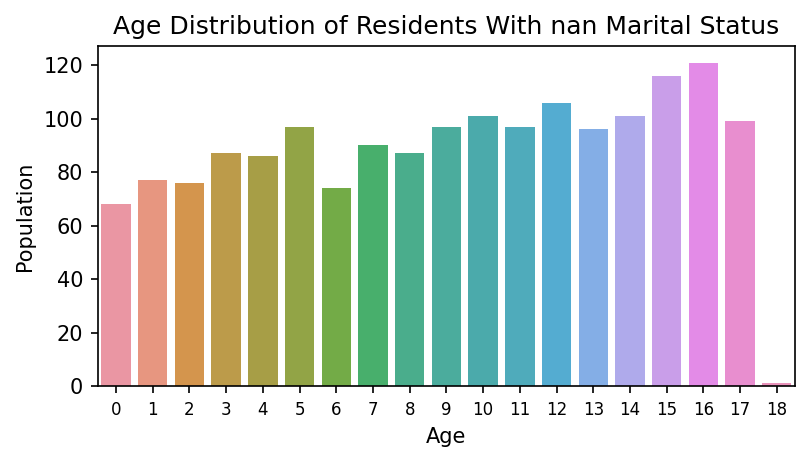

In [14]:
mar_stat_freq = null_mar_stat['Age'].value_counts().sort_index()

sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
plotter = sns.barplot(x=mar_stat_freq.index, y=mar_stat_freq)

plotter.set_xticklabels(mar_stat_freq.index, fontsize=8)
plotter.set_ylabel("Population"), plotter.set_xlabel('Age')

plotter.set_title("Age Distribution of Residents With nan Marital Status")

sns.categorical.plt.show()

In [15]:
# occupation distribution of those having nan marital status
null_mar_stat['Occupation'].unique()

array(['Student', 'Child'], dtype=object)

We can see from the Age and Occupation columns of those having nan marital status that all (except one 18 year old) are minors (below 18).<br>
***Since they are not eligible for marriage, I shall replace nan with "Ineligible".***

In [16]:
mar_stat.loc[null_mar_stat.index] = "Ineligible"

In [17]:
# Take a look at the only non-minor with a nan marital status
null_mar_stat.loc[null_mar_stat['Age'] >= 18]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
3696,50,Smith Manors,Kevin,Jones-Lewis,18,Grandson,NaN,M,Student,None,NaN,"50, Smith Manors",0,0,1


In [18]:
# Now let's check out his living situation
census_df.loc[census_df['Address'] == null_mar_stat.loc[3696, 'Address']]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
3693,50,Smith Manors,Simon,Lewis,67,Head,Married,M,Automotive engineer,None,Christian,"50, Smith Manors",0,1,0
3694,50,Smith Manors,Paula,Lewis,65,Wife,Married,F,"Geologist, engineering",None,Christian,"50, Smith Manors",0,1,0
3695,50,Smith Manors,Aaron,Lewis,19,Grandson,Single,M,University Student,None,Christian,"50, Smith Manors",0,0,1
3696,50,Smith Manors,Kevin,Jones-Lewis,18,Grandson,NaN,M,Student,None,NaN,"50, Smith Manors",0,0,1
3697,50,Smith Manors,Harry,Williams,14,Grandson,NaN,M,Student,None,NaN,"50, Smith Manors",0,0,1


**NOTE:**<br>
Seeing that Kevin Jones-Lewis is living with his grand-parents eventhough he's 18, it is reasonable to assume that he is single.<br>
Therefore, I shall assign to him a marital status of single<br><br>

In [19]:
mar_stat.loc[3696] = 'Single'

In [20]:
cd.null_checker(mar_stat)

0

No more nan values in the marital status series

#### Take a look at those with blank marital status

In [21]:
blank_mar_stat = census_df.loc[mar_stat.loc[mar_stat == ' '].index]
blank_mar_stat

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
2397,18,Green Wall,Justin,Rice,13,Grandson,,M,Student,None,NaN,"18, Green Wall",0,0,1


We can see that Justin Rice is only a 13 year-old boy, and his marital status is therefore automatically 'Ineligible'.

In [22]:
# assign Justin Rice a single marital status
mar_stat.loc[mar_stat == ' '] = "Ineligible"

In [23]:
print(mar_stat.unique())

['Married' 'Ineligible' 'Divorced' 'Widowed' 'Single']


#### Replace the old "Marital Status" column in the original census_df dataframe with cleaned series, "mar_stat".

In [24]:
census_df['Marital Status'] = mar_stat

#### Visualize the marital status distribution across the population

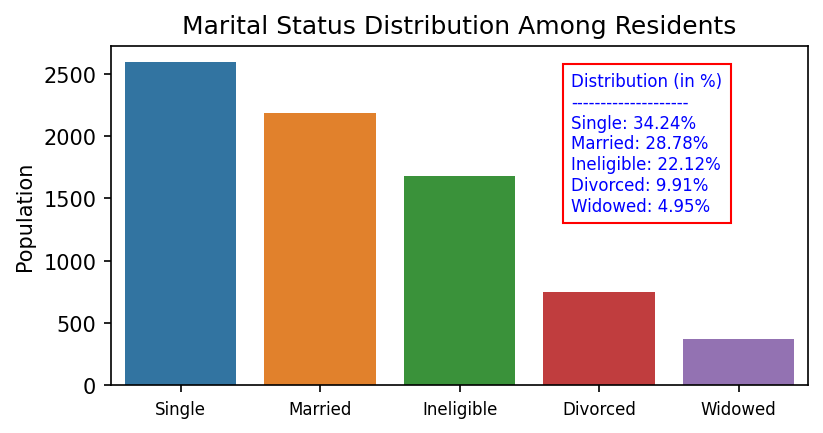

In [25]:
mar_stat_freq = census_df['Marital Status'].value_counts()
perc = sns.categorical.np.round(100 * mar_stat_freq/mar_stat.shape[0], 2)

marital_stat_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
plotter = sns.barplot(x=mar_stat_freq.index, y=mar_stat_freq)

plotter.set_xticklabels(mar_stat_freq.index, fontsize=8)
plotter.set_ylabel("Population"), plotter.set_xlabel(None)

plotter.set_title("Marital Status Distribution Among Residents")

plotter.text(2.8, 1400, "Distribution (in %)\n" +
            "-"*20 + "\n" +
            f"Single: {perc.loc['Single']}%\n" +
            f"Married: {perc.loc['Married']}%\n" +
            f"Ineligible: {perc.loc['Ineligible']}%\n" +
            f"Divorced: {perc.loc['Divorced']}%\n" +
            f"Widowed: {perc.loc['Widowed']}%",
            fontsize=8, color='blue',
             bbox={'edgecolor': 'red', 'facecolor': 'white'})

sns.categorical.plt.show()

In [26]:
# save figure to filesystem as pdf file
fname = 'marital_status_distribution_of_residents.pdf'
marital_stat_fig.savefig(fname, dpi=300, format='pdf', pad_inches=0.5, orientation='landscape')

___

### Religion

In [27]:
print(cd.null_checker(census_df)['Religion'])

1717


In [28]:
print(cd.check_for_empty_str(census_df)['Religion'])

True


In [29]:
print(cd.unique_categs(census_df)['Religion'])

['None', nan, 'Christian', 'Catholic', 'Muslim', 'Methodist', 'Jewish', 'Jedi', 'Sikh', 'Bahai', 'Agnostic', 'Undecided', ' ', 'Baptist', 'Private']


In [30]:
religion = copy.deepcopy(census_df['Religion'])

#### Fix religion of minors

**NOTE:**<br>
Firstly, make sure all minors (below 18 years old) do not have a religion by assigning their religion to be 'Ineligible'.

In [31]:
religion.loc[census_df.loc[census_df['Age'] < 18].index] = 'Ineligible'

#### Fix blank religion

In [32]:
blank_religion = census_df.loc[religion.loc[(religion == ' ') |
                                            (religion == '')].index]
blank_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
2432,31,Green Wall,Allan,Roberts,75,Head,Single,M,Retired Insurance account manager,None,,"31, Green Wall",1,1,0
7000,28,Crown Stravenue,Molly,Edwards,40,Head,Married,F,Government social research officer,None,,"28, Crown Stravenue",0,1,0
7034,41,Crown Stravenue,Melissa,Hall,58,None,Single,F,Production engineer,None,,"41, Crown Stravenue",0,1,0


**Fix blank religion**

In this situation, a blank/empty string in the Religion column simply means we DO NOT KNOW the religion of that individual.<br>
Therefore, I shall be using **'Undisclosed'** as a placeholder for blanks/empty strings.
<br><br>

In [33]:
religion.loc[blank_religion.index] = 'Unknown'

#### Fix nan Religion

In [34]:
null_religion = census_df.loc[religion.isnull()]
null_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
131,1,Wharf Place,George,Lane,18,None,Widowed,M,Student,None,NaN,"1, Wharf Place",0,0,1
227,37,Wharf Place,Michelle,Jackson,18,Head,Single,F,Student,None,NaN,"37, Wharf Place",0,0,1
455,8,Griffiths Inlet,Clive,Fisher,18,Head,Married,M,Student,None,NaN,"8, Griffiths Inlet",0,0,1
456,8,Griffiths Inlet,June,Fisher,19,Wife,Married,F,University Student,None,NaN,"8, Griffiths Inlet",0,0,1
473,17,Griffiths Inlet,Anthony,Wade,18,Head,Married,M,Student,None,NaN,"17, Griffiths Inlet",0,0,1
474,17,Griffiths Inlet,Sharon,Wade,20,Wife,Married,F,University Student,None,NaN,"17, Griffiths Inlet",0,0,1
970,47,Wharf Wells,Kerry,Wallace,18,Lodger,Divorced,F,Student,None,NaN,"47, Wharf Wells",0,0,1
1212,8,Guardian Road,Fiona,Ali,18,Lodger,Single,F,Student,None,NaN,"8, Guardian Road",0,0,1
1428,8,Coconutbelt Lane,Heather,Cook,18,Visitor,Single,F,Student,None,NaN,"8, Coconutbelt Lane",0,0,1
2043,33,Brooks Road,Philip,Robson,18,Head,Divorced,M,Student,None,NaN,"33, Brooks Road",0,0,1


In [35]:
# age distribution of those with nan religion
nan_religion_age_freq = null_religion['Age'].value_counts().sort_index()
nan_religion_age_freq_perc = sns.categorical.np.round(100 * null_religion['Age'].value_counts()/null_religion.shape[0], 2).sort_index()

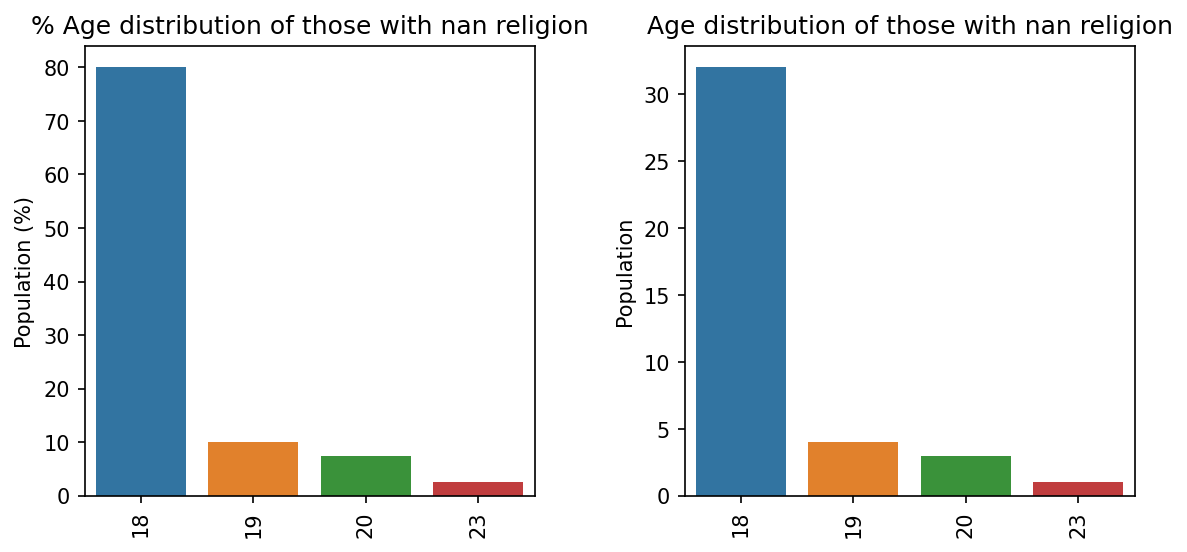

In [36]:
fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.8, 0, 0.6, 1])
# z, z2 = fig.add_axes([0.3, 0.4, 0.25, 0.25]), fig.add_axes([1.1, 0.4, 0.25, 0.25])

left = sns.barplot(x=nan_religion_age_freq_perc.index, y=nan_religion_age_freq_perc, order=nan_religion_age_freq_perc.index, ax=l)
right = sns.barplot(x=nan_religion_age_freq.index, y=nan_religion_age_freq, 
                    order=nan_religion_age_freq.index, ax=r)
# perc_zoomed = sns.barplot(y=minority_freq_perc.index, x=minority_freq_perc, ax=z,
#                      order=minority_freq_perc.index)
# zoomed = sns.barplot(y=minority_freq.index, x=minority_freq, ax=z2,
#                      order=minority_freq.index)

left.set_ylabel("Population (%)"), right.set_ylabel("Population")

left.set_xticklabels(nan_religion_age_freq_perc.index, rotation=90)
# left.set_ylim(0, 0.6)
right.set_xticklabels(nan_religion_age_freq.index, rotation=90)
# right.set_ylim(0, 2000)
# perc_zoomed.set_yticklabels(minority_freq_perc.index, fontsize=5)
# perc_zoomed.set_xlim(0, 0.1)
# zoomed.set_yticklabels(minority_freq.index, fontsize=5)

left.set_title("% Age distribution of those with nan religion")
right.set_title("Age distribution of those with nan religion")
# perc_zoomed.set_title("Minority")
# zoomed.set_title("Minority")

sns.relational.plt.show()

We can see that majority of those with nan religion are between 18-20 years old.<br>
**Therefore, those with a nan religion shall now be assigned 'Unknown' category as we DO NOT KNOW their true religion**

In [37]:
religion.loc[null_religion.index] = 'Unknown'

In [38]:
print(religion.unique())

['None' 'Ineligible' 'Christian' 'Catholic' 'Muslim' 'Methodist' 'Unknown'
 'Jewish' 'Jedi' 'Sikh' 'Bahai' 'Agnostic' 'Undecided' 'Baptist' 'Private']


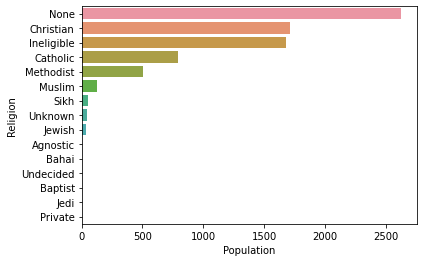

In [39]:
religion_freq = religion.value_counts()

plotted = sns.barplot(y=religion_freq.index, x=religion_freq)
plotted.set_xlabel('Population'), plotted.set_ylabel("Religion");

Some of the values here are actually sub-divisions of other values. For instance,<br>
Catholic, Methodist, and Baptist are all known Christian denominations. Thus, these should be classified as Christians.<br>
Also values like Private, Undecided, Jedi, and None shall be classified as 'Unknown'.
Unique values should include: <br>
***Christian, Muslim, Sikh, Bahai, Agnostic, Jewish, NA, Unknown***<br><br>

In [40]:
converter = {'Catholic': 'Christian', 
             'Methodist': 'Christian', 
             'Baptist': 'Christian',
             'None': 'Unknown',
            'Private': 'Unknown', 
             'Jedi': 'Unknown',
            'Undecided': 'Unknown'}
religion = cd.transform_val(religion, converter)

In [41]:
religion_freq = religion.value_counts()
rel_perc = sns.categorical.np.round(100 * religion_freq/religion.shape[0], 2)

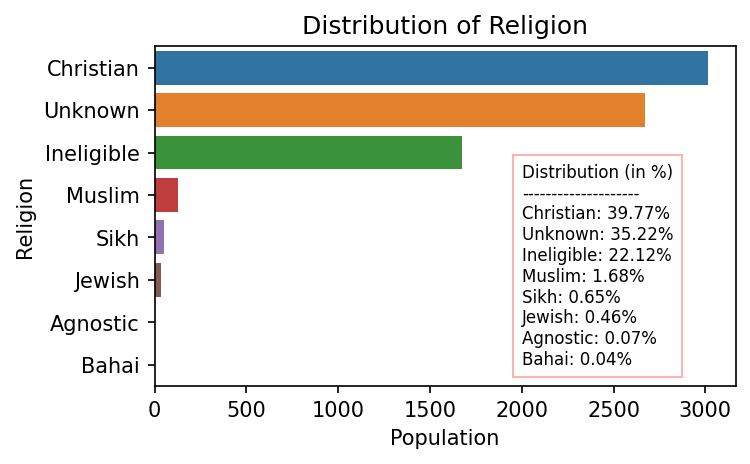

In [42]:
religion_distr_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

plotted = sns.barplot(y=religion_freq.index, x=religion_freq)

plotted.set_xlabel('Population'), plotted.set_ylabel("Religion")

plotted.text(2000, 7, "Distribution (in %)\n" +
            "-"*20 + "\n" +
            f"Christian: {rel_perc.loc['Christian']}%\n" +
            f"Unknown: {rel_perc.loc['Unknown']}%\n" +
            f"Ineligible: {rel_perc.loc['Ineligible']}%\n" +
            f"Muslim: {rel_perc.loc['Muslim']}%\n" +
            f"Sikh: {rel_perc.loc['Sikh']}%\n" +
            f"Jewish: {rel_perc.loc['Jewish']}%\n" +
            f"Agnostic: {rel_perc.loc['Agnostic']}%\n" +
            f"Bahai: {rel_perc.loc['Bahai']}%",
            bbox={'facecolor':'w', 'edgecolor': 'red', 'alpha': 0.3},
            fontsize=8)

plotted.set_title("Distribution of Religion");

In [43]:
# save figure to filesystem
fname = 'religion_distribution_fig.pdf'
religion_distr_fig.savefig(fname, format='pdf', dpi=300, pad_inches=0.5, bbox_inches='tight')

In [44]:
print(religion.unique())

['Unknown' 'Ineligible' 'Christian' 'Muslim' 'Jewish' 'Sikh' 'Bahai'
 'Agnostic']


#### Replace the old "Religion" column in the original census_df dataframe with cleaned series, "religion".

In [45]:
census_df['Religion'] = religion

In [46]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 7581 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       7581 non-null   object
 11  Address                        7581 non-null   object
 12  Retired                        7581 non-null   int64 
 13  Emp

In [47]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,Unknown,"1, Simmons Meadow",0,1,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,Unknown,"1, Simmons Meadow",0,1,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,Ineligible,F,Student,None,Ineligible,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,Ineligible,M,Student,None,Ineligible,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,Unknown,"1, Simmons Meadow",0,1,0


In [48]:
census_df.corr()

,House Number,Age,Retired,Employed,Is Student
House Number,1.000000,0.057964,0.054592,0.038616,-0.031086
Age,0.057964,1.000000,0.609902,0.658104,-0.602526
Retired,0.054592,0.609902,1.000000,0.258105,-0.193281
Employed,0.038616,0.658104,0.258105,1.000000,-0.748846
Is Student,-0.031086,-0.602526,-0.193281,-0.748846,1.000000


___

#### Save dataframe changes to filesystem as csv file

In [49]:
fname = "final_Marital_Status_and_Religion_cleaned.csv"
census_df.to_csv(fname, index=False)

___

**<center> THE END</center>**

___